In [21]:
from sklearn import cluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
user='S'

if user=='S':
    import geopandas as gpd
    mandat_dep=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/liste_mandat.csv")#on récupère le csv de la liste des mandats
    df_depu=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/listeDepute_complete.csv")

if user=='G':
    mandat_dep=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/liste_mandatdef.csv") 
    df_depu=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/listeDepute_complete.csv")

Essayons de faire un clustering sur les département selon leur orientation politique sous la troisième république

In [32]:
mandat_dep_3=mandat_dep[mandat_dep['Régime politique']=='Troisième République - Chambre des députés']
liste_groupe_3=mandat_dep_3['Groupe'].unique()
gros_groupe=[]
for groupe in liste_groupe_3 :
    if mandat_dep_3[mandat_dep_3['Groupe']==groupe]['Groupe'].count()>10 :
        gros_groupe+=[groupe]#on va se concentrer sur les gros groupes pour diminuer la complexité
datadep=[]
for departement in mandat_dep_3['Département'].unique():
    newdep=[]
    dep_3=mandat_dep_3[mandat_dep_3['Département']==departement]
    nbremand=dep_3['Groupe'].count()
    for groupe in gros_groupe :
        pct_groupe=dep_3[dep_3['Groupe']==groupe]['Groupe'].count()/nbremand#pourcentage de députés du département issu de ce groupe
        newdep+=[pct_groupe]#on rajoute les données du groupe dans le dataframe du département
    datadep+=[newdep]#on rajoute les données du département au futur dataframe général 
datadep_bis=np.array(datadep)#on crée un dataframe avec les informations
depmt_groupe = pd.DataFrame(datadep_bis, index=mandat_dep_3['Département'].unique(),columns=gros_groupe)
    

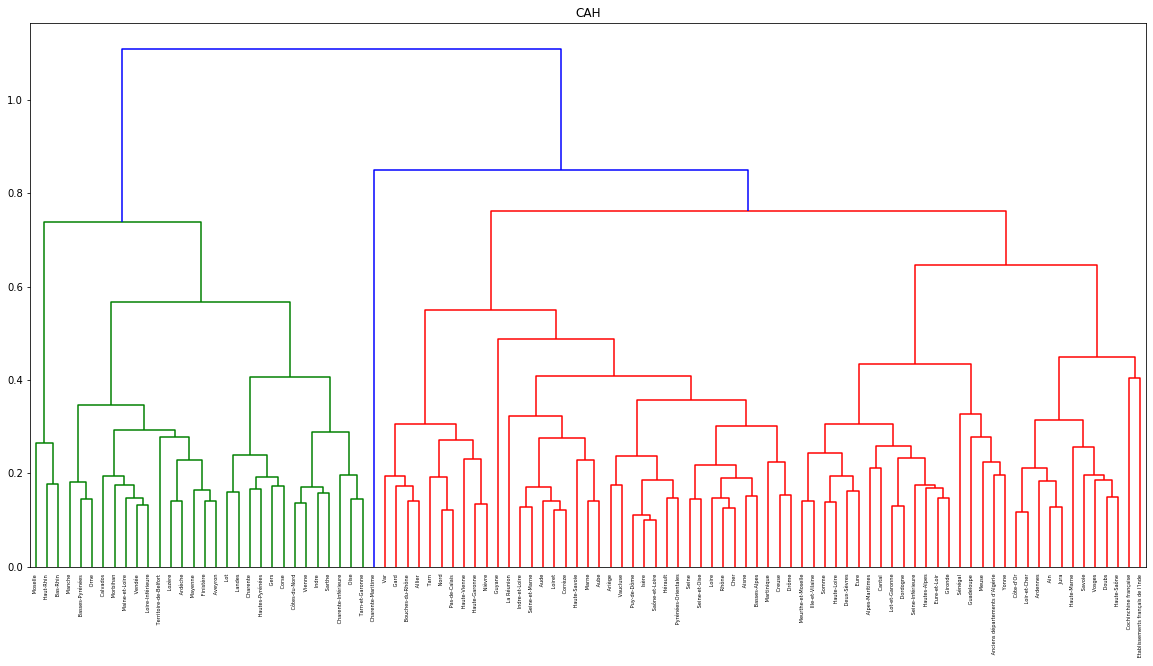

In [33]:
plt.figure(figsize=(20,10))
#générer la matrice des liens

Z = linkage(depmt_groupe,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=depmt_groupe.index)
plt.show()


In [34]:

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(depmt_groupe)
idk = np.argsort(kmeans.labels_)#on trie les index
#affichage des observations et leurs groupes
clusters=pd.DataFrame(kmeans.labels_[idk], depmt_groupe.index[idk], columns=['Appartenance'])
depmt_app=depmt_groupe.merge(clusters, right_index=True, left_index=True)
#distances aux centres de classes des observations
dist_centre=kmeans.transform(depmt_groupe)
#print(dist_centre)
dist_centre.mean()#les départements sont en moyenne plus proches d'un centre que de l'autre : bonne nouvelle ! Deux groupes relativement distincts a priori !


0.2153585591153429

In [48]:
centres=pd.DataFrame(kmeans.cluster_centers_, index=['0','1'],columns=gros_groupe)
pd.set_option('display.max_columns', None)

display(centres)

,Socialiste,Gauche indépendante,Fédération républicaine de France,Républicain radical et radical-socialiste,Non inscrit,Républicains indépendants et d'action sociale,Indépendants d'action populaire,Communiste,Indépendants de gauche,Gauche démocratique et radicale indépendante,Gauche radicale,Alliance des républicains de gauche et des radicaux indépendants,Parti socialiste,Députés indépendants,Indépendants,Indépendants républicains,Union républicaine démocratique,Républicains de gauche,Union socialiste et républicaine,Fédération républicaine,Démocrate populaire,Députés du centre républicain,Parti socialiste de France,Radical et radical-socialiste,Parti républicain socialiste et socialiste français,Parti républicain socialiste,Parti socialiste français,Démocrates populaires,Républicain et social,Démocrates,Gauche républicaine démocratique,Action démocratique et sociale,Entente républicaine démocratique,Gauche sociale et radicale,Action républicaine et sociale,Républicain socialiste,Républicain socialiste et socialiste français,Union républicaine radicale et socialiste,Parti radical et radical socialiste,Gauche démocratique,Parti républicain radical et radical socialiste,Républicains radicaux-socialistes,Action libérale,Républicain progressiste,Gauche radicale-socialiste,Socialistes parlementaires,Droites,Socialistes unifiés,Union démocratique,Gauche démocratique,Républicains progressistes,Radical-socialiste,Progressiste,Union républicaine,Défense nationale,Républicains nationalistes,Républicain radical,Union des Droites,Républicain,Républicain,Extrême-gauche,Gauche républicaine,Radical,Extreme-gauche,Appel au peuple,Centre gauche,Gauche,Union conservatrice,Opportuniste,Centre droit,Extrême-droite,Union des gauches
0,0.008593,0.005353,0.010951,0.045831,0.035400,0.004076,1.026852e-02,0.005574,0.005563,0.004620,0.068684,0.005903,0.028846,0.011123,0.008559,0.001357,0.038231,0.034497,0.003455,0.013525,0.007734,0.004274,0.001770,0.015341,0.001694,0.001535,0.001555,0.005684,0.003020,0.004999,0.018939,0.002713,0.034189,0.000381,0.004306,0.007000,0.003049,0.001928,0.007649,0.017020,0.017386,0.012272,0.039249,0.013699,0.010668,0.000958,0.008141,0.002029,0.014375,0.010623,0.029394,0.007254,0.009975,0.036054,0.004556,0.004350,0.004456,0.119945,0.004844,0.003880,3.469447e-18,0.030107,-6.505213e-19,4.336809e-19,0.048531,0.030278,0.000989,0.003221,0.003080,0.004489,0.002378,0.002733
1,0.027208,0.003919,0.001264,0.067219,0.018446,0.001935,5.204170e-18,0.008225,0.006597,0.004223,0.124150,0.004557,0.069025,0.003884,0.003647,0.000465,0.011434,0.020792,0.004777,0.003965,0.000735,0.002316,0.003835,0.022597,0.001850,0.001941,0.001742,0.000270,0.000905,0.000220,0.014184,0.002778,0.015303,0.002397,0.003545,0.020302,0.007355,0.003350,0.015544,0.014746,0.025385,0.022427,0.007051,0.007194,0.028775,0.014321,0.000409,0.005591,0.016510,0.014470,0.023298,0.031915,0.004756,0.095740,0.000517,0.002007,0.012764,0.010230,0.003254,0.004244,1.772030e-02,0.059442,3.081498e-03,2.191206e-03,0.006728,0.021381,0.001391,0.000000,0.003982,0.002371,0.000339,0.001912


Il y a un centre qui semble effectivement plus à gauche que l'autre !

In [35]:
#récupération d'une carte des départements français
import requests
import tempfile
import zipfile
temporary_location = tempfile.gettempdir()
def download_unzip(url, dirname =temporary_location, destname = "borders"):#fonction qui dézippe
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref: 
        zip_ref.extractall(dirname + '/' + destname)
download_unzip('https://www.data.gouv.fr/fr/datasets/r/3096e551-c68d-40ce-8972-a228c94c0ad1')#l'URL où on trouve les départements
carte_departement = gpd.read_file(tempfile.gettempdir() + "/borders/departements-20140306-100m.dbf")#on va chercher le fichier là où on l'a stocké
carte_metrop = carte_departement.loc[0:95]#on enlève les départements d'outre-mer pour avoir une carte lisible
carte_metrop.set_index('nom', inplace=True)#on met le nom du département en index pour pouvoir joindre les bases

In [37]:

depmt_app.index=[i[1:] for i in depmt_app.index]#on commence par enlever l'espace qui est au début du nom des départements
ind_val=carte_metrop.index.values#on remplace les anciens noms de département par les actuels
ind_val[ind_val=="Côtes-d'Armor"]='Côtes-du-Nord'#et on traite chaque cas de changement de nom
ind_val[ind_val=="Seine-Maritime"]='Seine-Inférieure'
ind_val[ind_val=="Alpes-de-Haute-Provence"]='Basses-Alpes'
ind_val[ind_val=="Loire-Atlantique"]='Loire-Inférieure'
ind_val[ind_val=="Pyrénées-Atlantiques"]='Basses-Pyrénées'
ind_val[ind_val=="Charente-Maritime"]='Charente-Inférieure'
ind_val[ind_val=="Hauts-de-Seine"]='Seine'
ind_val[ind_val=="Paris"]='Seine'
ind_val[ind_val=="Seine-Saint-Denis"]='Seine'
ind_val[ind_val=="Val-de-Marne"]='Seine'
ind_val[ind_val=="Haute-Corse"]='Corse'
ind_val[ind_val=="Corse-du-Sud"]='Corse'
ind_val[ind_val=="Essonne"]='Seine-et-Oise'
ind_val[ind_val=="Val-d'Oise"]='Seine-et-Oise'
ind_val[ind_val=="Yvelines"]='Seine-et-Oise'

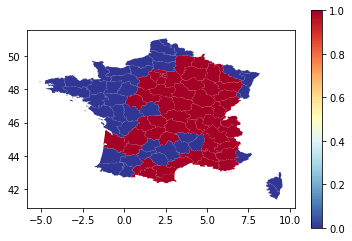

In [40]:
df = carte_metrop.merge(depmt_app, how = 'inner', left_index=True, right_index=True)
df.plot(column = 'Appartenance', cmap = 'RdYlBu_r', legend=True)#on crée des cartes